In [23]:
import sys
sys.path.append("..")

import torch
from PIL import Image
from pycocotools.mask import decode as coco_mask_decode

from visualization import visualize
from utils import BBox

In [24]:
def load_image(name):
    return Image.open(f"../assets/dataset/images/{name}.jpg")

def decode(x):
    x["image"] = load_image(x["name"])
    for r in x["records"]:
        r["mask"] = coco_mask_decode(r["mask_rle"])
        r["bbox"] = BBox(r["bbox"])
    return x


In [25]:
data = torch.load("../output/20250923-191101-db4d/checkpoint-20/evaluation.pth")
data = [decode(x) for x in data]

|1|Skateboarder|246,237,338,379|
|2|Skateboard|236,336,286,380|
|3|Skateboard|200,284,247,343|
|4|Skateboard|160,262,167,278|
|5|Skateboard|153,262,158,278|
|6|Skateboard|148,262,152,278|
|7|Skateboard|138,262,143,278|
|8|Skateboard|129,262,134,278|
|9|Skateboard|119,262,124,278|
|10|Skateboard|109,262,114,278|
|END|
<|im_end|>


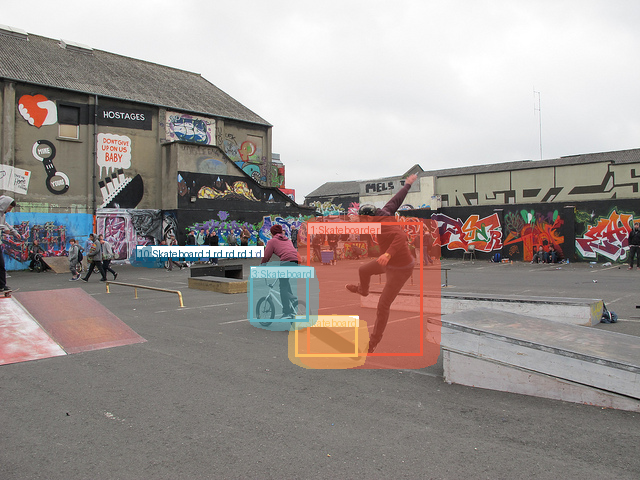

In [29]:
print(data[0]["output_text"])
visualize(data[0]["image"], data[0]["records"])